## Hierarchical (Agglomerative 'Bottom-Up') Clustering | Full Case-Study (Mall Customers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Importing Dataset

In [3]:
mall = pd.read_csv(r'G:\Udemy Courses Files\Python Machine Learning Diploma\3-clustering-materials\datasets\mall-customers.csv')

In [4]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Extracting Features

In [6]:
X = mall.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Exploring Data

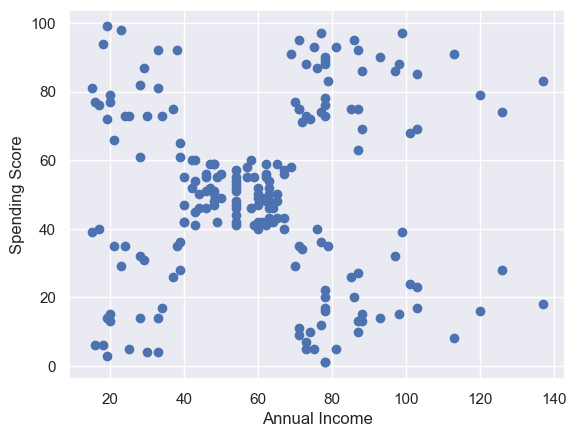

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

=> Use Dendrogram to Explore Data

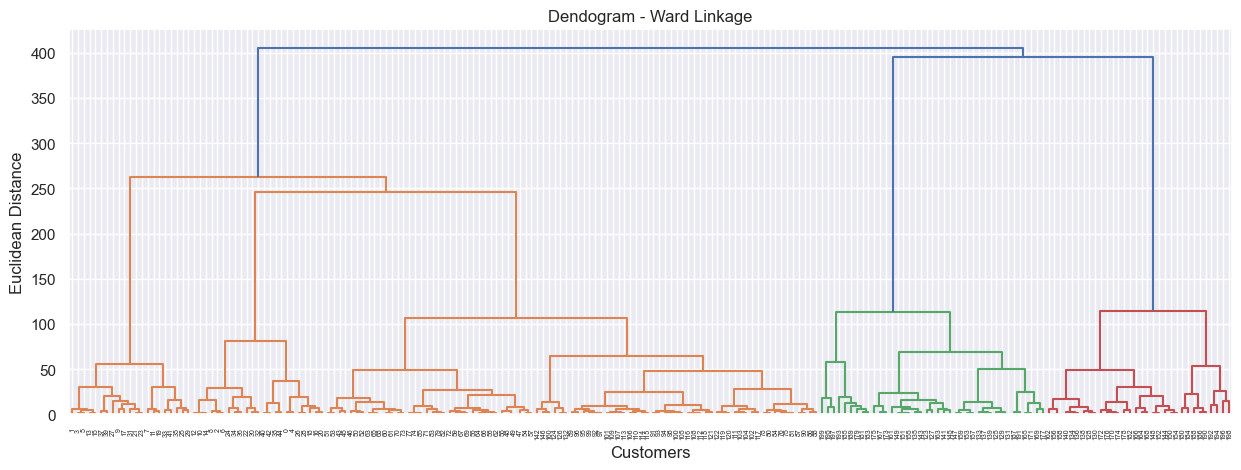

In [42]:
import scipy.cluster.hierarchy as hc

# ‘ward’ minimizes the variance of the clusters being merged.

plt.figure(figsize=(15,5))
dendogram = hc.dendrogram(hc.linkage(X,method = 'ward'))
plt.title('Dendogram - Ward Linkage') 
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

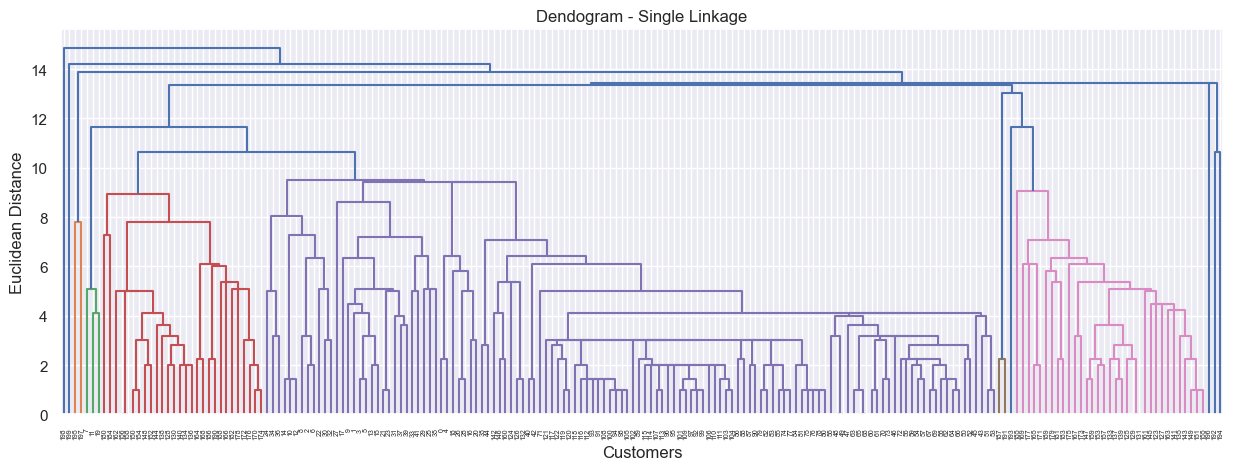

In [44]:
# ‘single’ uses the minimum of the distances between all observations of the two sets.

plt.figure(figsize=(15,5))
dendogram = hc.dendrogram(hc.linkage(X,method = 'single'))
plt.title('Dendogram - Single Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

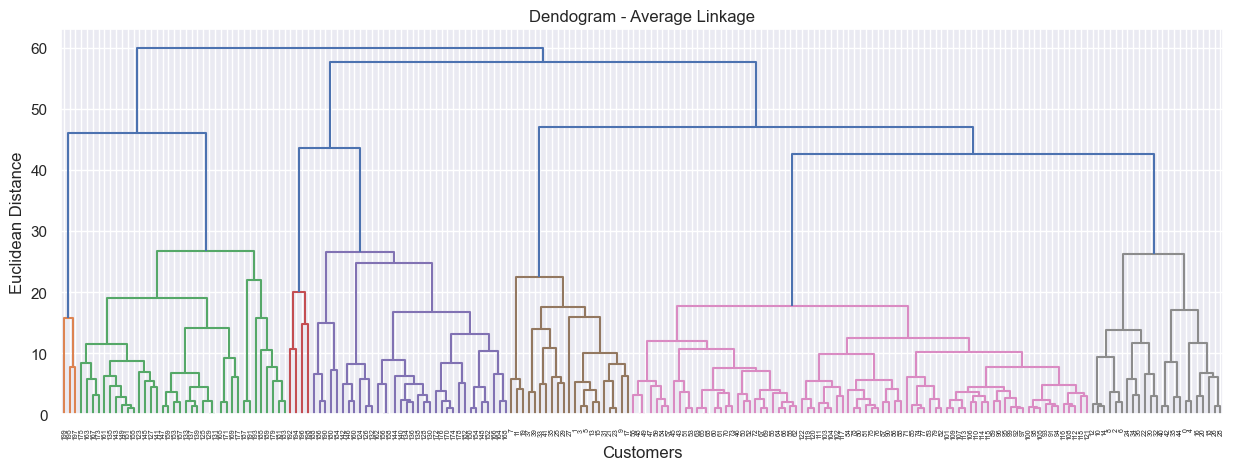

In [46]:
# ‘average’ uses the average of the distances of each observation of the two sets.

plt.figure(figsize=(15,5))
dendogram = hc.dendrogram(hc.linkage(X,method = 'average'))
plt.title('Dendogram - Average Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

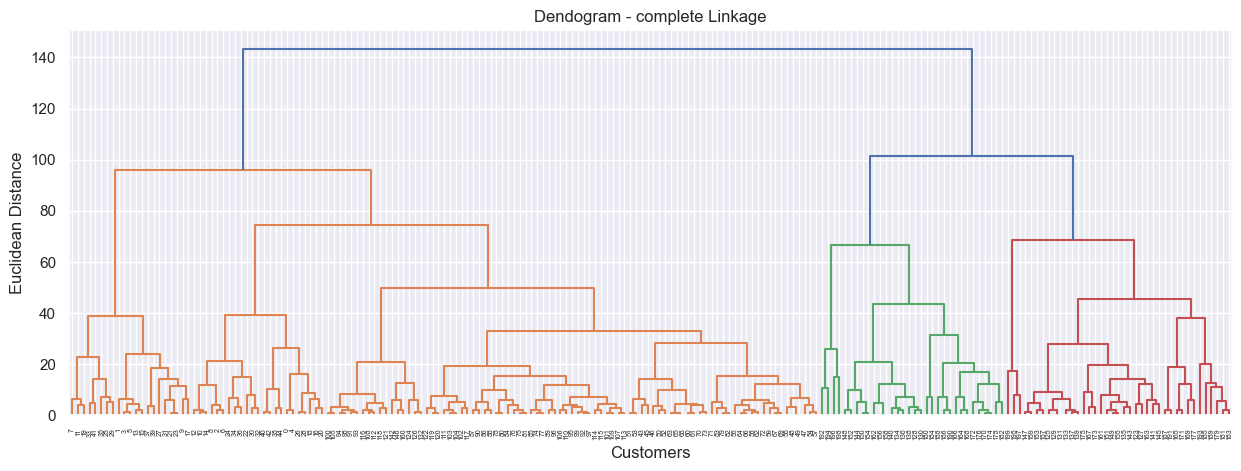

In [47]:
# complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

plt.figure(figsize=(15,5))
dendogram = hc.dendrogram(hc.linkage(X,method = 'complete'))
plt.title('Dendogram - complete Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

#### Model Training & Prediction

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [26]:
clustering.fit(X)


AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [28]:
clustering.get_params()

{'affinity': 'deprecated',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 5}

In [27]:
clustering.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [30]:
y_clustering =  clustering.fit_predict(X)
y_clustering

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

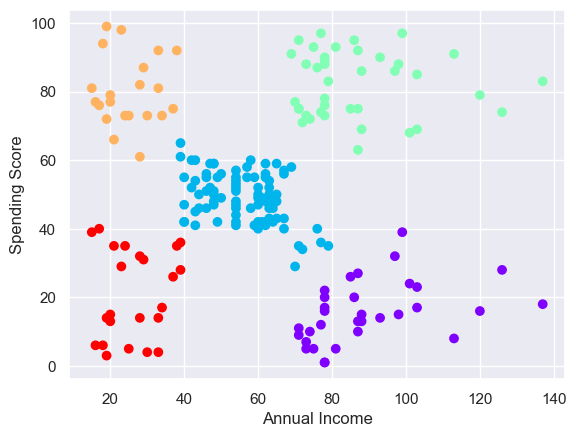

In [34]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow')
plt.title('Hierarchical Clustering of Mall Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Getting Data Ready for Supervised Learning after clustering and labeling

In [35]:
mall_clustered =  mall.copy()
mall_clustered

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [36]:
mall_clustered['cluster'] = y_clustering

In [37]:
mall_clustered

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
